In [62]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import lazypredict

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [63]:
df_ger = pd.read_csv('Data/India.csv',  index_col='Year')
df_ger # the one with categorical variable for Germany

Country ISO 3166-1 alpha-3        Total         Coal         Oil  \
Year                                                                    
1980   India                IND   291.711364   197.337053   83.176464   
1981   India                IND   314.966469   210.305446   89.713040   
1982   India                IND   325.380295   213.123221   94.406624   
1983   India                IND   352.199157   232.519456   99.169824   
1984   India                IND   361.559743   231.492925  106.104774   
1985   India                IND   397.592455   253.289252  116.759685   
1986   India                IND   426.309754   273.171658  121.857312   
1987   India                IND   455.343444   291.856287  127.671122   
1988   India                IND   491.692596   317.172040  133.615088   
1989   India                IND   540.651493   339.625896  150.714021   
1990   India                IND   577.996538   366.514068  158.166611   
1991   India                IND   615.365508   393.043111  166.422544   
1992   India                IND   655.447568   411.415002  188.054800   
1993   India                IND   677.299816   433.121813  186.878656   
1994   India                IND   716.268589   455.720366  198.955200   
1995   India                IND   761.449242   471.723186  216.281275   
1996   India                IND   825.200806   504.498913  243.160345   
1997   India                IND   858.935134   527.722798  244.201936   
1998   India                IND   876.952083   524.125992  262.892000   
1999   India                IND   950.950878   560.528326  300.510056   
2000   India                IND   978.103843   572.876810  312.286549   
2001   India                IND   991.731661   582.083456  316.115271   
2002   India                IND  1022.175223   598.598121  324.587833   
2003   India                IND  1058.725338   625.890755  329.936696   
2004   India                IND  1124.517704   669.968548  347.518127   
2005   India                IND  1184.926501   721.469674  351.646194   
2006   India                IND  1258.643267   773.565357  368.891165   
2007   India                IND  1356.953125   842.478182  391.027790   
2008   India                IND  1461.518268   910.796506  412.316303   
2009   India                IND  1611.416152   983.948220  431.609933   
2010   India                IND  1676.495006  1015.983089  438.373461   
2011   India                IND  1778.472509  1089.807084  458.909201   
2012   India                IND  1962.594350  1244.606043  488.554125   
2013   India                IND  2037.415492  1319.998650  495.642138   
2014   India                IND  2187.343005  1447.354894  511.166221   
2015   India                IND  2270.766191  1487.461399  554.788779   
2016   India                IND  2383.815964  1529.990408  613.165557   
2017   India                IND  2434.867906  1560.988150  631.087430   
2018   India                IND  2600.446463  1677.600364  655.190293   
2019   India                IND  2626.459473  1677.653708  674.011463   
2020   India                IND  2445.011942  1588.060207  603.602160   
2021   India                IND  2709.683625  1802.311897  622.148121   

             Gas  
Year              
1980    2.487856  
1981    2.883568  
1982    4.360160  
1983    5.243184  
1984    6.170118  
1985    7.199698  
1986   10.310496  
1987   12.776272  
1988   15.205600  
1989   18.517739  
1990   21.097187  
1991   23.563184  
1992   27.256496  
1993   26.996352  
1994   28.996896  
1995   39.050735  
1996   39.746906  
1997   46.023504  
1998   47.595360  
1999   42.315536  
2000   43.872736  
2001   43.568933  
2002   47.133696  
2003   49.987952  
2004   49.584753  
2005   50.438624  
2006   49.442016  
2007   52.695648  
2008   63.046601  
2009  112.684767  
2010  134.244240  
2011  136.364239  
2012  125.604798  
2013  110.689227  
2014  109.467500  
2015  106.870633  
2016  113.622467  
2017  118.922003  
2018  126.201229  
2019  128.675

In [64]:
# Drop the categorial variables
df= df_ger.select_dtypes(include=['float64'])
df

Total         Coal         Oil         Gas
Year                                                  
1980   291.711364   197.337053   83.176464    2.487856
1981   314.966469   210.305446   89.713040    2.883568
1982   325.380295   213.123221   94.406624    4.360160
1983   352.199157   232.519456   99.169824    5.243184
1984   361.559743   231.492925  106.104774    6.170118
1985   397.592455   253.289252  116.759685    7.199698
1986   426.309754   273.171658  121.857312   10.310496
1987   455.343444   291.856287  127.671122   12.776272
1988   491.692596   317.172040  133.615088   15.205600
1989   540.651493   339.625896  150.714021   18.517739
1990   577.996538   366.514068  158.166611   21.097187
1991   615.365508   393.043111  166.422544   23.563184
1992   655.447568   411.415002  188.054800   27.256496
1993   677.299816   433.121813  186.878656   26.996352
1994   716.268589   455.720366  198.955200   28.996896
1995   761.449242   471.723186  216.281275   39.050735
1996   825.200806   504.498913  243.160345   39.746906
1997   858.935134   527.722798  244.201936   46.023504
1998   876.952083   524.125992  262.892000   47.595360
1999   950.950878   560.528326  300.510056   42.315536
2000   978.103843   572.876810  312.286549   43.872736
2001   991.731661   582.083456  316.115271   43.568933
2002  1022.175223   598.598121  324.587833   47.133696
2003  1058.725338   625.890755  329.936696   49.987952
2004  1124.517704   669.968548  347.518127   49.584753
2005  1184.926501   721.469674  351.646194   50.438624
2006  1258.643267   773.565357  368.891165   49.442016
2007  1356.953125   842.478182  391.027790   52.695648
2008  1461.518268   910.796506  412.316303   63.046601
2009  1611.416152   983.948220  431.609933  112.684767
2010  1676.495006  1015.983089  438.373461  134.244240
2011  1778.472509  1089.807084  458.909201  136.364239
2012  1962.594350  1244.606043  488.554125  125.604798
2013  2037.415492  1319.998650  495.642138  110.689227
2014  2187.343005  1447.354894  511.166221  109.467500
2015  2270.766191  1487.461399  554.788779  106.870633
2016  2383.815964  1529.990408  613.165557  113.622467
2017  2434.867906  1560.988150  631.087430  118.922003
2018  2600.446463  1677.600364  655.190293  126.201229
2019  2626.459473  1677.653708  674.011463  128.675994
2020  2445.011942  1588.060207  603.602160  127.635380
2021  2709.683625  1802.311897  622.148121  133.450811

In [65]:
#  plot to see total emission versus year for 'Germany'
fig_ger = px.line(df, x=df.index, y="Total")
fig_ger.update_xaxes(rangeslider_visible=True)
fig_ger.show()

Visualize the time series

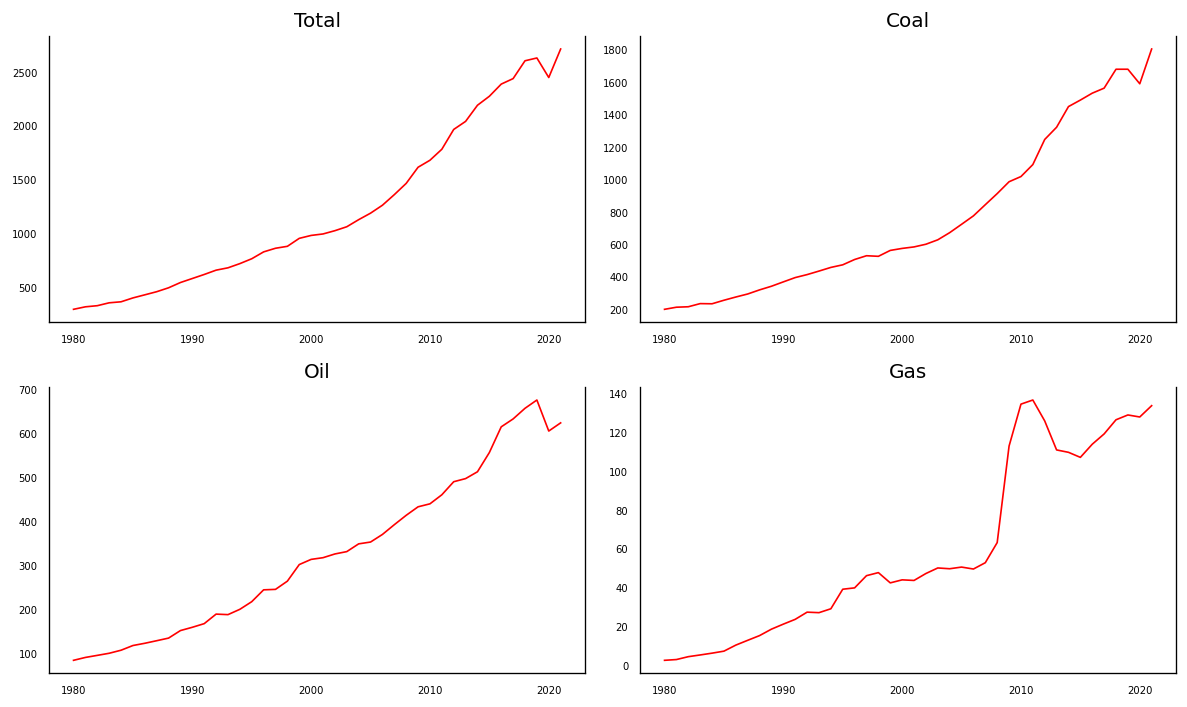

In [66]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

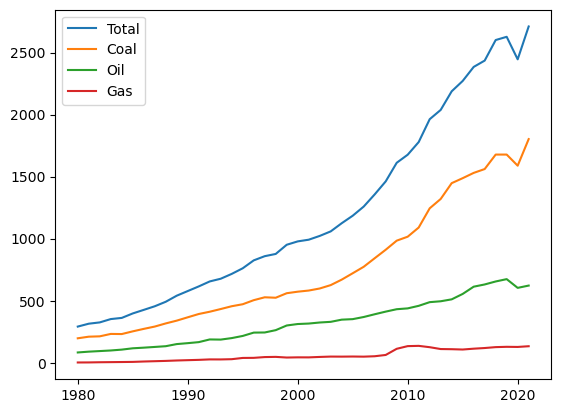

In [67]:
plt.figure()

x = df.index
y1 = df['Total']
y2 = df['Coal']
y3 = df['Oil']
y4 = df['Gas']






plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)




plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

Grainger's Causality Test

In [68]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

Total_x  Coal_x  Oil_x  Gas_x
Total_y      1.0     0.0    0.0    0.0
Coal_y       0.0     1.0    0.0    0.0
Oil_y        0.0     0.0    1.0    0.0
Gas_y        0.0     0.0    0.0    1.0

 Cointegration Test

In [69]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Total  ::  109.7     > 40.1749   =>   True
Coal   ::  57.59     > 24.2761   =>   True
Oil    ::  22.37     > 12.3212   =>   True
Gas    ::  3.49      > 4.1296    =>   False


Split the Series into Training and Testing Data

In [70]:
nobs = 5
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape) 

(37, 4)
(5, 4)


Check for Stationarity and Make the Time Series Stationary

In [71]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [72]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.1619
 No. Lags Chosen       = 6
 Critical value 1%     = -3.67
 Critical value 5%     = -2.964
 Critical value 10%    = -2.621
 => P-Value = 0.9988. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 5.4664
 No. Lags Chosen       = 0
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. No

In [73]:
# The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.
# 1st difference
df_differenced = df_train.diff().dropna()

In [74]:
# Re-run ADF test on each differenced series.
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    ### result: all the time series became stationary ###

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.0039
 No. Lags Chosen       = 10
 Critical value 1%     = -3.724
 Critical value 5%     = -2.986
 Critical value 10%    = -2.633
 => P-Value = 0.9589. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.3814
 No. Lags Chosen       = 4
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.9808. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit roo

In [75]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [76]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3157
 No. Lags Chosen       = 7
 Critical value 1%     = -3.7
 Critical value 5%     = -2.976
 Critical value 10%    = -2.628
 => P-Value = 0.1669. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.6802
 No. Lags Chosen       = 3
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sig

How to Select the Order (P) of VAR model

In [77]:
# To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.
# Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  18.28888201215702
BIC :  19.186741144284177
FPE :  88408147.39780058
HQIC:  18.595077690073772 

Lag Order = 2
AIC :  18.593584322650635
BIC :  20.226138026068615
FPE :  125803194.14576633
HQIC:  19.14288897154014 

Lag Order = 3
AIC :  17.88069237703141
BIC :  20.26251321908096
FPE :  71099184.10896392
HQIC:  18.670198600551824 

Lag Order = 4
AIC :  16.62182364745042
BIC :  19.767343966966223
FPE :  28439841.746859025
HQIC:  17.64718483914819 

Lag Order = 5
AIC :  16.033700404110736
BIC :  19.957053072764772
FPE :  35043637.39792027
HQIC:  17.28881463203937 

Lag Order = 6
AIC :  10.234568993164919
BIC :  14.94938220001483
FPE :  935443.4845114376
HQIC:  11.711189668428215 

Lag Order = 7
AIC :  -225.49031227939065
BIC :  -219.9711793086648
FPE :  3.132283654716375e-95
HQIC:  -223.80305830775765 

Lag Order = 8
AIC :  -233.59562514265122
BIC :  -227.26042268663005
FPE :  2.0149954492106756e-102
HQIC:  -231.71183733897752 

Lag Order = 9
AIC :  -236.4684686845198

In [78]:
# An alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method.
#x = model.select_order(maxlags=6)
#x.summary()

We choose p = 2 as the number of lags (AIC is locally minimum at p=2)

Train the VAR Model of Selected Order(p)

In [79]:
p=2
model_fitted = model.fit(p)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Mar, 2023
Time:                     09:56:38
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    20.2261
Nobs:                     33.0000    HQIC:                   19.1429
Log likelihood:          -458.094    FPE:                1.25803e+08
AIC:                      18.5936    Det(Omega_mle):     4.79458e+07
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            5.848141         5.037061            1.161           0.246
L1.Total        -0.108008         2.589823           -0.042           0.967
L1.Coal         -1.046155         2.776564           -0.377           0.706
L1.O

Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic. Results close to 2 is alright.

In [80]:
from statsmodels.stats.stattools import durbin_watson

def adjust(val, length= 6): return str(val).ljust(length)
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Total  : 1.55
Coal   : 1.42
Oil    : 2.22
Gas    : 2.15


How to Forecast VAR model using statsmodels

In [81]:
df_differenced

Total       Coal        Oil        Gas
Year                                             
1982  -12.841279 -10.150618  -1.842992   1.080880
1983   16.405036  16.578460   0.069616  -0.593568
1984  -17.458276 -20.422766   2.171750   0.043910
1985   26.672126  22.822858   3.719961   0.102646
1986   -7.315413  -1.913921  -5.557284   2.081218
1987    0.316391  -1.197777   0.716183  -0.645022
1988    7.315462   6.631124   0.130156  -0.036448
1989   12.609745  -2.861897  11.154967   0.882811
1990  -11.613852   4.434316  -9.646343  -0.732691
1991    0.023925  -0.359129   0.803343  -0.113451
1992    2.713090  -8.157152  13.376323   1.227315
1993  -18.229812   3.334920 -22.808400  -3.953456
1994   17.116525   0.891742  13.252688   2.260688
1995    6.211880  -6.595733   5.249531   8.053295
1996   18.570911  16.772907   9.552995  -9.357668
1997  -30.017236  -9.551842 -25.837479   5.580427
1998  -15.717379 -26.820691  17.648473  -4.704742
1999   55.981846  39.999140  18.927992  -6.851680
2000  -46.845830 -24.053850 -25.841563   6.837024
2001  -13.525147  -3.141838  -7.947771  -1.861003
2002   16.815744   7.308019   4.643840   3.868566
2003    6.106553  10.777969  -3.123699  -0.710507
2004   29.242251  16.785159  12.232568  -3.257455
2005   -5.383569   7.423333 -13.453364   1.257070
2006   13.307969   0.594557  13.116904  -1.850479
2007   24.593092  16.817142   4.891654   4.250240
2008    6.255285  -0.594501  -0.848112   7.097321
2009   45.332741   4.833390  -1.994883  39.287213
2010  -84.819030 -41.116845 -12.530102 -28.078693
2011   36.898649  41.789126  13.772212 -19.439474
2012   82.144338  80.974964   9.109184 -12.879440
2013 -109.300699 -79.406352 -22.556911  -4.156130
2014   75.106371  51.963637   8.436070  13.693844
2015  -66.504327 -87.249739  28.098475  -1.375140
2016   29.626587   2.422504  14.754220   9.348701

In [82]:
# In order to forecast, the VAR model expects up to the lag order number of observations from the past data.
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

2


array([[-66.504327, -87.249739,  28.098475,  -1.37514 ],
       [ 29.626587,   2.422504,  14.75422 ,   9.348701]])

In [83]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs) # nobs is from test train split ratio
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

Total_2d    Coal_2d    Oil_2d    Gas_2d
Year                                          
2017  18.549072  18.276288  2.466579 -1.512734
2018 -34.008453 -20.663532 -9.146289 -3.799843
2019  31.042120  19.721250  7.415816  2.987589
2020  -5.193928  -5.696128  3.363051 -2.305149
2021  -1.559436  -0.366311 -3.551360  1.872511

Invert the transformation to get the real forecast

In [84]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [85]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

Total_forecast  Coal_forecast  Oil_forecast  Gas_forecast
Year                                                           
2017     2515.414809    1590.795705    674.008914    118.861567
2018     2613.005201    1630.937470    725.705982    120.300824
2019     2741.637713    1690.800485    784.818866    124.727671
2020     2865.076297    1744.967373    847.294802    126.849368
2021     2986.955444    1798.767949    906.219377    130.843577

In [86]:
df_test

Total         Coal         Oil         Gas
Year                                                  
2017  2434.867906  1560.988150  631.087430  118.922003
2018  2600.446463  1677.600364  655.190293  126.201229
2019  2626.459473  1677.653708  674.011463  128.675994
2020  2445.011942  1588.060207  603.602160  127.635380
2021  2709.683625  1802.311897  622.148121  133.450811

Plot of Forecast vs Actuals

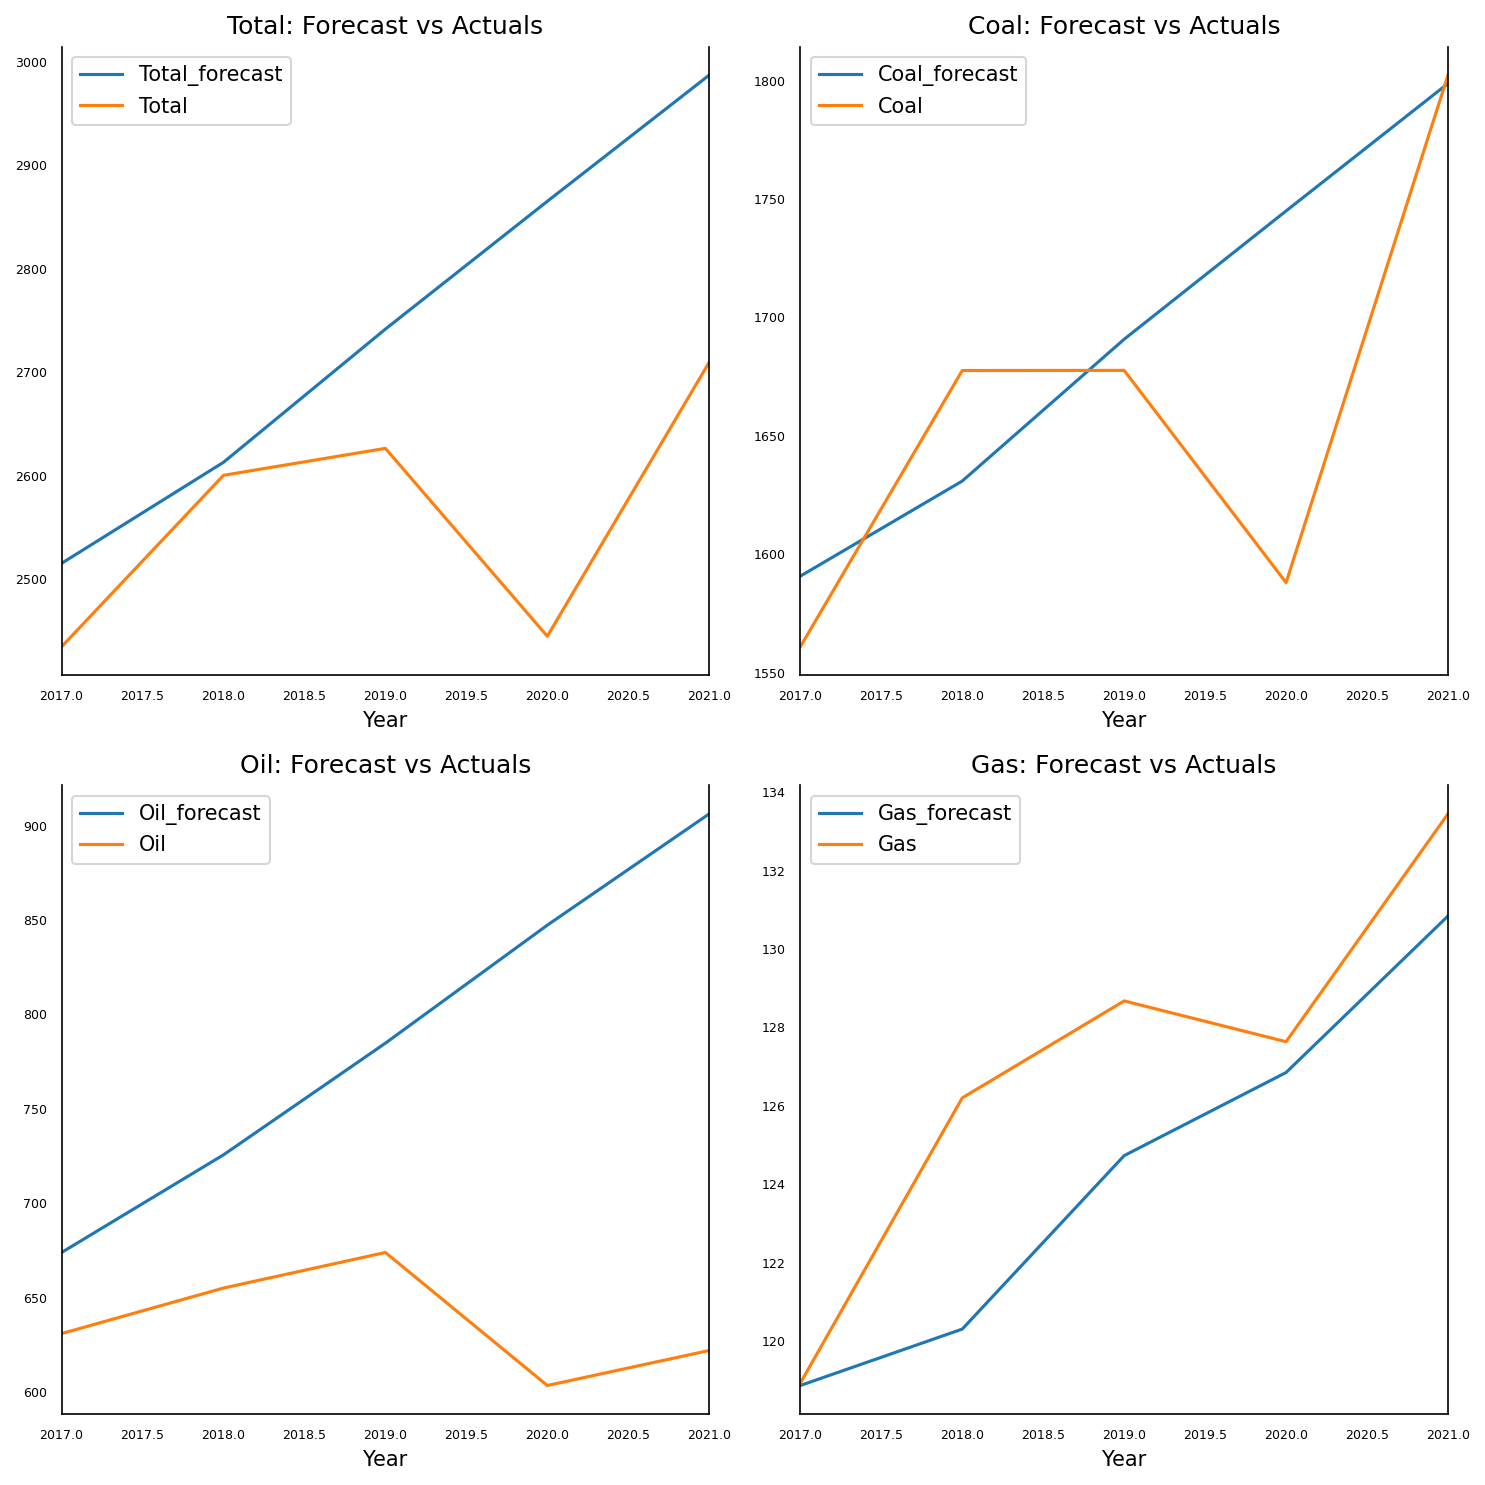

In [87]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Evaluate the Forecasts

In [88]:
# To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Total')
accuracy_prod = forecast_accuracy(df_results['Total_forecast'].values, df_test['Total'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Coal')
accuracy_prod = forecast_accuracy(df_results['Coal_forecast'].values, df_test['Coal'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Oil')
accuracy_prod = forecast_accuracy(df_results['Oil_forecast'].values, df_test['Oil'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Gas')
accuracy_prod = forecast_accuracy(df_results['Gas_forecast'].values, df_test['Gas'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: Total
mape   :  0.0712
me     :  181.124
mae    :  181.124
mpe    :  0.0712
rmse   :  233.7714
corr   :  0.5035
minmax :  0.0637

Forecast Accuracy of: Coal
mape   :  0.0311
me     :  29.9309
mae    :  50.0137
mpe    :  0.0192
rmse   :  74.6608
corr   :  0.6392
minmax :  0.0292

Forecast Accuracy of: Oil
mape   :  0.2401
me     :  150.4017
mae    :  150.4017
mpe    :  0.2401
rmse   :  178.424
corr   :  -0.4197
minmax :  0.1806

Forecast Accuracy of: Gas
mape   :  0.0207
me     :  -2.6605
mae    :  2.6605
mpe    :  -0.0207
rmse   :  3.4007
corr   :  0.8936
minmax :  0.0207


Forecasting the future: for 2 years (since p=2)

In [89]:
df_differenced_all = df.diff().dropna()

In [90]:
df_differenced_all

Total        Coal        Oil        Gas
Year                                              
1981   23.255105   12.968393   6.536576   0.395712
1982   10.413826    2.817775   4.693584   1.476592
1983   26.818862   19.396235   4.763200   0.883024
1984    9.360586   -1.026531   6.934950   0.926934
1985   36.032712   21.796327  10.654911   1.029580
1986   28.717299   19.882406   5.097627   3.110798
1987   29.033690   18.684629   5.813810   2.465776
1988   36.349152   25.315753   5.943966   2.429328
1989   48.958897   22.453856  17.098933   3.312139
1990   37.345045   26.888172   7.452590   2.579448
1991   37.368970   26.529043   8.255933   2.465997
1992   40.082060   18.371891  21.632256   3.693312
1993   21.852248   21.706811  -1.176144  -0.260144
1994   38.968773   22.598553  12.076544   2.000544
1995   45.180653   16.002820  17.326075  10.053839
1996   63.751564   32.775727  26.879070   0.696171
1997   33.734328   23.223885   1.041591   6.276598
1998   18.016949   -3.596806  18.690064   1.571856
1999   73.998795   36.402334  37.618056  -5.279824
2000   27.152965   12.348484  11.776493   1.557200
2001   13.627818    9.206646   3.828722  -0.303803
2002   30.443562   16.514665   8.472562   3.564763
2003   36.550115   27.292634   5.348863   2.854256
2004   65.792366   44.077793  17.581431  -0.403199
2005   60.408797   51.501126   4.128067   0.853871
2006   73.716766   52.095683  17.244971  -0.996608
2007   98.309858   68.912825  22.136625   3.253632
2008  104.565143   68.318324  21.288513  10.350953
2009  149.897884   73.151714  19.293630  49.638166
2010   65.078854   32.034869   6.763528  21.559473
2011  101.977503   73.823995  20.535740   2.119999
2012  184.121841  154.798959  29.644924 -10.759441
2013   74.821142   75.392607   7.088013 -14.915571
2014  149.927513  127.356244  15.524083  -1.221727
2015   83.423186   40.106505  43.622558  -2.596867
2016  113.049773   42.529009  58.376778   6.751834
2017   51.051942   30.997742  17.921873   5.299536
2018  165.578557  116.612214  24.102863   7.279226
2019   26.013010    0.053344  18.821170   2.474765
2020 -181.447531  -89.593501 -70.409303  -1.040614
2021  264.671683  214.251690  18.545961   5.815431

In [91]:
forecast_input_all = df_differenced_all.values[-lag_order:]
forecast_input_all # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

array([[-181.447531,  -89.593501,  -70.409303,   -1.040614],
       [ 264.671683,  214.25169 ,   18.545961,    5.815431]])

In [92]:
model_all = VAR(df_differenced_all)
model_fitted_all = model_all.fit(p)
model_fitted_all.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Mar, 2023
Time:                     09:56:39
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    20.8471
Nobs:                     39.0000    HQIC:                   19.8625
Log likelihood:          -561.929    FPE:                2.52109e+08
AIC:                      19.3115    Det(Omega_mle):     1.09871e+08
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           45.902570        15.738895            2.917           0.004
L1.Total       -13.728388         3.237569           -4.240           0.000
L1.Coal         15.213652         3.507449            4.338           0.000
L1.O

In [93]:
# Forecast

fc_all = model_fitted_all.forecast(y=forecast_input_all, steps=nobs) # nobs is from test train split ratio
df_forecast_all = pd.DataFrame(fc_all, index=[2022,2023,2024,2025,2026], columns=df.columns + '_2d')
df_forecast_all

Total_2d     Coal_2d     Oil_2d    Gas_2d
2022   62.476641   -3.192241  64.153943 -4.707046
2023 -106.464356  -59.874943 -25.135975  0.147752
2024  227.419120  179.239116  16.271453  9.448179
2025  109.600343   26.751090  65.056727  5.483182
2026 -142.985822  -91.158847 -29.825073  1.027566